<a href="https://colab.research.google.com/github/SheikhMudassarHanif/NLP/blob/main/TextTranslationRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**I Will be Implementing text translation using Simple RNN and LSTM and compare their performance**

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#
import tensorflow as tf
from tensorflow import keras

In [166]:

excel_file_path = '/content/parallel-corpus.xlsx'
column_names = pd.read_excel(excel_file_path, nrows=0).columns.tolist()
df = pd.read_excel(excel_file_path,usecols=[column_names[0],column_names[1]])
df.dropna(inplace=True)
df.head()

,SENTENCES,MEANING
0,How can I communicate with my parents?,میں اپنے والدین سے کیسے بات کروں ؟
1,How can I make friends?’,میں دوست کیسے بنائوں ؟
2,Why do I get so sad?’,میں اتنا اداس کیوں ہوں؟.
3,"If you’ve asked yourself such questions, you’r...",اگر آپ نے اپنے آپ سے ایسے سوالات کیے ہیں، تو آ...
4,"Depending on where you’ve turned for guidance,...",اس بات پر منحصر ہے کہ آپ رہنمائی کے لیے کہاں ...


In [167]:
column_names

['SENTENCES ', 'MEANING']

In [168]:
train,val,test=np.split(df.sample(frac=1),[int(0.8*len(df)),int(0.9*len(df))])

In [169]:
len(train),len(val),len(test)

(23693, 2962, 2962)

In [170]:

from LughaatNLP import LughaatNLP
urdu_text_processing = LughaatNLP()

In [171]:
t1=df['MEANING'][0]

In [172]:
t1

'میں اپنے والدین سے کیسے بات کروں ؟'

In [173]:
urdu_text_processing.normalize(t1)

'میں اپنے والدین سے کیسے بات کروں ؟'

In [174]:
def Normalize_label(text):
    # Check if the input is not a string
    if not isinstance(text, str):
        text = str(text)  # Convert it to a string
    return urdu_text_processing.normalize(text)


In [175]:
df['MEANING']=df['MEANING'].apply(Normalize_label)

In [176]:
import re

def Normalize_Input(text):
    # Check if the input is not a string
    if not isinstance(text, str):
        text = str(text)  # Convert non-string values to string
    # Convert to lowercase and remove punctuation
    text = text.lower()
    text = re.sub(r'[^\w\s?.!]+', '', text)  # Remove punctuation
    return text


In [177]:
df['SENTENCES ']=df['SENTENCES '].apply(Normalize_Input)

In [178]:
df.head()

,SENTENCES,MEANING
0,how can i communicate with my parents?,میں اپنے والدین سے کیسے بات کروں ؟
1,how can i make friends?,میں دوست کیسے بنائوں ؟
2,why do i get so sad?,میں اتنا اداس کیوں ہوں ؟ .
3,if youve asked yourself such questions youre n...,اگر اپ نے اپنے اپ سے ایسے سوالات کیے ہیں، تو ا...
4,depending on where youve turned for guidance y...,اس بات پر منحصر ہے کہ اپ رہنمائی کے لیے کہاں گ...


#Input and Labels normalized now converting them into embeddings


In [179]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Hyper parameters adjustment

In [181]:
vocab_size=10000
embedding_dim=50
max_length=200
trunc_type='post'
oov_tok='<OOV>'

In [182]:
# vocab_size_eng = len(tokenizer_eng.word_index) + 1  # Vocabulary size for English
# vocab_size_urdu = len(tokenizer_urdu.word_index) + 1  # Vocabulary size for Urdu


extracted the dataset into relative segments train test validation

In [183]:
train_inputs=train['SENTENCES '].values
val_inputs=val['SENTENCES '].values
test_inputs=test['SENTENCES '].values


val_inputs_str=[str(x) for x in val_inputs]
test_inputs_str=[str(x) for x in test_inputs]
train_inputs_str = [str(x) for x in train_inputs]


#tokenization of input (english sentences)
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_inputs_str)

#vectorization of input

train_sequences = tokenizer.texts_to_sequences(train_inputs_str)
val_sequences = tokenizer.texts_to_sequences(val_inputs_str)
test_sequences = tokenizer.texts_to_sequences(test_inputs_str)

#Pad the sequences to ensure equal length
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)
val_padded = pad_sequences(val_sequences, maxlen=max_length, truncating=trunc_type)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)


In [184]:
train_labels=train['MEANING'].values
train_labels = [str(x) for x in train_labels]
# tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_labels)

In [185]:
train_labels_sequences = tokenizer.texts_to_sequences(train_labels)
padded_train_labels = pad_sequences(train_labels_sequences, maxlen=max_length, truncating=trunc_type)

In [186]:
val_labels=val['MEANING'].values
val_labels = [str(x) for x in val_labels]
# tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(val_labels)
val_labels_sequences = tokenizer.texts_to_sequences(val_labels)
padded_val_labels = pad_sequences(val_labels_sequences, maxlen=max_length, truncating=trunc_type)

In [187]:
test_labels=test['MEANING'].values
test_labels = [str(x) for x in test_labels]
# tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(test_labels)
test_labels_sequences = tokenizer.texts_to_sequences(test_labels)
padded_test_labels = pad_sequences(test_labels_sequences, maxlen=max_length, truncating=trunc_type)

In [188]:
padded_train_labels.shape,padded_val_labels.shape,padded_test_labels.shape

((23693, 200), (2962, 200), (2962, 200))

Now designing a neural network RNN

In [189]:
#important to check
print(train_padded.dtype)
print(padded_train_labels.dtype),print(padded_val_labels.dtype),print(padded_test_labels.dtype)


int32
int32
int32
int32


(None, None, None)

##Simple RNN layer used

In [190]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),  # Simple RNN layer
    # tf.keras.layers.SimpleRNN(64, return_sequences=True),
    # Another Simple RNN layer
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
    # tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(vocab_size, activation='softmax'))  # Output layer for each time step
])

##Used Adam as optimimizer and sparse_categorical_crossentropy for loss calculation because it is used for multiclass classification

In [191]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [192]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_16 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [193]:
history = model.fit(
    train_padded,
    np.expand_dims(padded_train_labels, -1),  # Reshaping labels to match model output
    batch_size=32,
    epochs=5,
    validation_data=(val_padded, padded_val_labels)
)


Epoch 1/5
741/741 ━━━━━━━━━━━━━━━━━━━━ 2165s 3s/step - accuracy: 0.9000 - loss: 1.9691 - val_accuracy: 0.9282 - val_loss: 0.7481
Epoch 2/5
  4/741 ━━━━━━━━━━━━━━━━━━━━ 27:08 2s/step - accuracy: 0.9222 - loss: 0.5860

KeyboardInterrupt: 

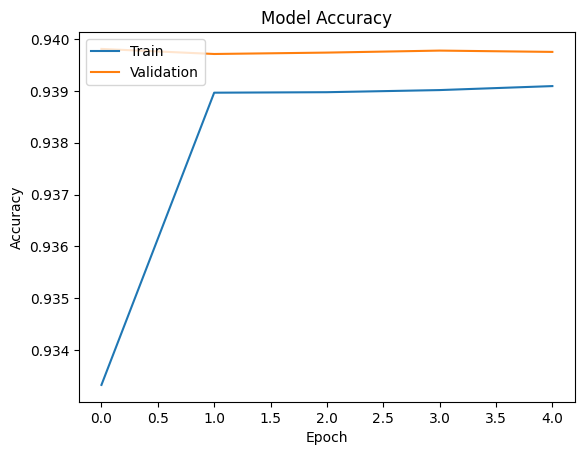

In [160]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

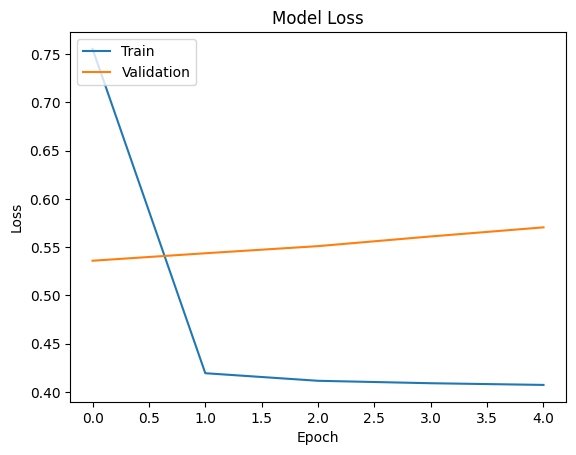

In [161]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


In [162]:

def Model_ready_input(text):
  text=str(text)
  text=Normalize_Input(text)
  text_sequence = tokenizer.texts_to_sequences([text])
  text_padded = pad_sequences(text_sequence, maxlen=max_length, truncating=trunc_type)
  return text_padded


##Simple RNN  Result on test dataset  

---
accuracy: 0.8931 - loss: 0.8018


In [163]:
model.evaluate(test_padded,padded_test_labels)


93/93 ━━━━━━━━━━━━━━━━━━━━ 19s 205ms/step - accuracy: 0.9364 - loss: 0.6235


[0.6053740978240967, 0.9382546544075012]

#Translating english to urdu

In [164]:
import numpy as np
from nltk.translate.bleu_score import sentence_bleu

# Example English sentences
english_sentences = ["How are you?", "What is your name?", "I am learning machine translation."]

# Reference Urdu translations (ground truth)
reference_translations = [
    ['آپ کیسے ہیں؟'],  # Reference for "How are you?"
    ['آپ کا نام کیا ہے؟'],  # Reference for "What is your name?"
    ['میں مشین ترجمہ سیکھ رہا ہوں۔']  # Reference for "I am learning machine translation."
]

# Generate Urdu translations using your model
generated_translations = []
for sentence in english_sentences:
    text = Model_ready_input(sentence)  # Your function to prepare input
    prediction = model.predict(text)
    # Assuming your prediction returns token indices, convert them back to words
    translated_sentence = tokenizer.sequences_to_texts(np.argmax(prediction, axis=-1).tolist())
    generated_translations.append(translated_sentence[0])

# Now calculate BLEU scores for each sentence
bleu_scores = []
for reference, candidate in zip(reference_translations, generated_translations):
    score = sentence_bleu(reference, candidate.split())  # Split the candidate into words
    bleu_scores.append(score)

# Calculate the average BLEU score
average_bleu = np.mean(bleu_scores)
print("Average BLEU score:", average_bleu)

# Print each generated translation with its BLEU score
for i, (generated, score) in enumerate(zip(generated_translations, bleu_scores)):
    print(f"Input: {english_sentences[i]} => Predicted: {generated} (BLEU score: {score})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Average BLEU score: 0.0
Input: How are you? => Predicted: <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <O

In [165]:
def translate_english_to_urdu(input_text):
    # Step 1: Preprocess the input
    input_text = str(input_text)  # Ensure it's a string
    input_sequence = tokenizer.texts_to_sequences([input_text])  # Tokenize the input text
    input_padded = pad_sequences(input_sequence, maxlen=max_length, truncating=trunc_type)  # Pad the sequence

    # Step 2: Predict the Urdu sequence
    prediction = model.predict(input_padded)  # Get the model's output (predicted token indices)

    # Step 3: Post-process the prediction
    # Get the index of the word with the highest probability at each time step
    predicted_sequence = np.argmax(prediction, axis=-1)[0]  # Take the first sequence in the batch

    # Step 4: Convert the predicted token indices back to words
    urdu_translation = ''
    for token in predicted_sequence:
        if token != 0:  # Skip padding tokens
            word = tokenizer.index_word.get(token, '<OOV>')  # Convert index to word, or OOV if not found
            urdu_translation += word + ' '

    return urdu_translation.strip()  # Return the final translation

# Example usage:
english_input = "How are you?"
urdu_output = translate_english_to_urdu(english_input)
print(f"Input: {english_input} => Predicted Urdu Translation: {urdu_output}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Input: How are you? => Predicted Urdu Translation: <OOV> <OOV>


Testing

In [194]:
import pandas as pd

# Create a DataFrame
data = {
    'english': [
        "Hello, how are you?",
        "What is your name?",
        "I am learning.",
        "Where do you live?",
        "It is a beautiful day.",
        "I love reading books.",
        "How old are you?",
        "This is my favorite movie.",
        "Can you help me?",
        "Thank you very much!"
    ],
    'urdu': [
        "ہیلو، آپ کیسے ہیں؟",
        "آپ کا نام کیا ہے؟",
        "میں سیکھ رہا ہوں۔",
        "آپ کہاں رہتے ہیں؟",
        "یہ ایک خوبصورت دن ہے۔",
        "مجھے کتابیں پڑھنا پسند ہے۔",
        "آپ کی عمر کیا ہے؟",
        "یہ میری پسندیدہ فلم ہے۔",
        "کیا آپ میری مدد کر سکتے ہیں؟",
        "آپ کا بہت شکریہ!"
    ]
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv('english_urdu_corpus.csv', index=False)


In [195]:
df.head()

,english,urdu
0,"Hello, how are you?",ہیلو، آپ کیسے ہیں؟
1,What is your name?,آپ کا نام کیا ہے؟
2,I am learning.,میں سیکھ رہا ہوں۔
3,Where do you live?,آپ کہاں رہتے ہیں؟
4,It is a beautiful day.,یہ ایک خوبصورت دن ہے۔


In [196]:
train,val,test=np.split(df.sample(frac=1),[int(0.8*len(df)),int(0.9*len(df))])

In [197]:
vocab_size=1000
embedding_dim=50
max_length=200
trunc_type='post'
oov_tok='<OOV>'
train_inputs=train['english'].values
val_inputs=val['english'].values
test_inputs=test['english'].values


val_inputs_str=[str(x) for x in val_inputs]
test_inputs_str=[str(x) for x in test_inputs]
train_inputs_str = [str(x) for x in train_inputs]


#tokenization of input (english sentences)
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_inputs_str)

#vectorization of input

train_sequences = tokenizer.texts_to_sequences(train_inputs_str)
val_sequences = tokenizer.texts_to_sequences(val_inputs_str)
test_sequences = tokenizer.texts_to_sequences(test_inputs_str)

#Pad the sequences to ensure equal length
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)
val_padded = pad_sequences(val_sequences, maxlen=max_length, truncating=trunc_type)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)


In [198]:
train_labels=train['urdu'].values
train_labels = [str(x) for x in train_labels]
# tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_labels)
train_labels_sequences = tokenizer.texts_to_sequences(train_labels)
padded_train_labels = pad_sequences(train_labels_sequences, maxlen=max_length, truncating=trunc_type)

In [199]:
val_labels=val['urdu'].values
val_labels = [str(x) for x in val_labels]
# tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(val_labels)
val_labels_sequences = tokenizer.texts_to_sequences(val_labels)
padded_val_labels = pad_sequences(val_labels_sequences, maxlen=max_length, truncating=trunc_type)

In [200]:
test_labels=test['urdu'].values
test_labels = [str(x) for x in test_labels]
# tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(test_labels)
test_labels_sequences = tokenizer.texts_to_sequences(test_labels)
padded_test_labels = pad_sequences(test_labels_sequences, maxlen=max_length, truncating=trunc_type)

In [201]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),  # Simple RNN layer
    # tf.keras.layers.SimpleRNN(64, return_sequences=True),
    # Another Simple RNN layer
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
    # tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(vocab_size, activation='softmax'))  # Output layer for each time step
])

In [202]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [207]:
history = model.fit(
    train_padded,
    np.expand_dims(padded_train_labels, -1),  # Reshaping labels to match model output
    batch_size=32,
    epochs=400,
    validation_data=(val_padded, padded_val_labels)
)


Epoch 1/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.9756 - loss: 0.5817 - val_accuracy: 0.9800 - val_loss: 0.6409
Epoch 2/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9763 - loss: 0.5791 - val_accuracy: 0.9800 - val_loss: 0.6373
Epoch 3/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9763 - loss: 0.5735 - val_accuracy: 0.9800 - val_loss: 0.6339
Epoch 4/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9769 - loss: 0.5701 - val_accuracy: 0.9800 - val_loss: 0.6307
Epoch 5/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9756 - loss: 0.5661 - val_accuracy: 0.9800 - val_loss: 0.6275
Epoch 6/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.9756 - loss: 0.5640 - val_accuracy: 0.9800 - val_loss: 0.6244
Epoch 7/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.9756 - loss: 0.5589 - val_accuracy: 0.9800 - val_loss: 0.6214
Epoch 8/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9762 - loss: 0.5553 - val_accuracy: 0.9800 - v

In [208]:
model.evaluate(test_padded,padded_test_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.9800 - loss: 0.2609


[0.2609279453754425, 0.9800000190734863]

In [212]:
def translate_english_to_urdu(input_text):
    # Step 1: Preprocess the input
    input_text = str(input_text)  # Ensure it's a string
    input_sequence = tokenizer.texts_to_sequences([input_text])  # Tokenize the input text
    input_padded = pad_sequences(input_sequence, maxlen=max_length, truncating=trunc_type)  # Pad the sequence

    # Step 2: Predict the Urdu sequence
    prediction = model.predict(input_padded)  # Get the model's output (predicted token indices)

    # Step 3: Post-process the prediction
    # Get the index of the word with the highest probability at each time step
    predicted_sequence = np.argmax(prediction, axis=-1)[0]  # Take the first sequence in the batch

    # Step 4: Convert the predicted token indices back to words
    urdu_translation = ''
    for token in predicted_sequence:
        if token != 0:  # Skip padding tokens
            word = tokenizer.index_word.get(token, '<OOV>')  # Convert index to word, or OOV if not found
            urdu_translation += word + ' '

    return urdu_translation.strip()  # Return the final translation

# Example usage:
english_input = "what are you doing?"
urdu_output = translate_english_to_urdu(english_input)
print(f"Input: {english_input} => Predicted Urdu Translation: {urdu_output}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Input: what are you doing? => Predicted Urdu Translation: میری ایک فلم کیا
